<a href="https://colab.research.google.com/github/sumankanukollu/EVA_4_Assignments/blob/master/EVA_4_S9_Suman_Kanukollu_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps Summary

In [0]:
# 1. Mount google drive
# 2. Import all modules and libraries
# 3. Set the directory path of google drive
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test



**1. Mount google drive**




In [2]:
from google.colab import drive
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# 2. Auto load the modified content
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




**2.   Import all required modules**




In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets,transforms

from torchsummary import summary

from tqdm import tqdm

import  matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.debugger import set_trace

import numpy as np
!pip install albumentations

     |████████████████████████████████| 634kB 8.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=dbe419d1b7401bc913b28384c9b3631c984726326e8008858e233aaebd1ce306
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


**3. Set the modules homepath and library path**

In [5]:
import os,sys
os.chdir('/content/drive/My Drive/pytorch_Framework_suman')
homepath = os.getcwd()
print('\n### Home Path is : {}'.format(homepath))
!ls
sys.path.append(os.path.join(homepath,'lib'))
print(sys.path)


### Home Path is : /content/drive/My Drive/pytorch_Framework_suman
albumentation_resnet18_cifar10_main.ipynb  outputs
data					   resnet18_cifar10_main.ipynb
EVA-4-S9-Suman-Kanukollu-Main.ipynb	   root
lib					   sampleImages
models					   utils
['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/pytorch_Framework_suman/lib']


**4. Set Device**

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
print(torch.cuda.is_available())

cuda
True


**5. Import All reusable modules**

In [0]:
from models import resnet
from lib.loadDataSet import dataSetFunctions
from utils.showimgs import utils_showimgs

**6. Load transformations**

In [0]:
dsObj = dataSetFunctions()
transform_train, transform_test = dsObj.albumentationTransformations()

**7. Load dataset**

In [9]:
(trainset,testset)          = dsObj.dataSet(transform=(transform_train, transform_test),name='cifar10')
(train_loader,test_loader)  = dsObj.dataLoader(trainDataset=trainset,testDataset=testset)


### Preparing dataset for the name : cifar10
Files already downloaded and verified
Files already downloaded and verified

### Loading data from dataset


**8. Load classes**

In [10]:
dsObj.dataSetClasses(trainset)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**9. Just get some random images from Train dataset and plot those**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
tensor([9, 7, 3, 0, 7, 7, 6, 6, 6, 5, 1, 0, 6, 9, 9, 1, 5, 8, 5, 2, 5, 6, 4, 2,
        1, 8, 8, 1, 0, 5, 9, 4, 6, 8, 7, 6, 6, 1, 1, 6, 7, 2, 8, 6, 2, 4, 8, 6,
        7, 1, 5, 6, 0, 0, 9, 9, 9, 7, 4, 6, 0, 4, 2, 7, 7, 7, 0, 4, 7, 1, 8, 7,
        7, 8, 5, 5, 4, 8, 7, 6, 8, 3, 5, 6, 1, 9, 7, 6, 8, 8, 8, 6, 8, 7, 2, 0,
        4, 2, 6, 4, 7, 0, 2, 7, 7, 4, 7, 0, 0, 7, 5, 4, 8, 5, 2, 8, 0, 8, 2, 6,
        4, 4, 7, 1, 5, 3, 3, 2])
     truck      horse        cat   airplane


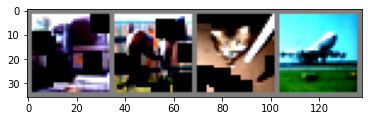

In [11]:
#from utils.showimgs import utils_showimgs
utObj = utils_showimgs()

utObj.getRandomTrainImgs(trainset,train_loader)

**10. Load Resnet18 model on to respective device (GPU or CPU) and print summary**

In [12]:
from models import resnet
print('Model is going to run on device : {}'.format(device))
model = resnet.ResNet18().to(device)
summary(model,(3,32,32))

Model is going to run on device : cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728


**11. Define loss function and optimizer**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#net = model
#criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters(), lr = 0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)'''

**12. Run Train and Test**

In [14]:
from lib import trainTestMethods
for epoch in range(20):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 0
 [================================================================>]  Step: 93ms | Tot: 53s277ms | Train >> Loss: 1.683 | Acc: 37.776% (18888/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s442ms | Test >> Loss: 1.362 | Acc: 50.580% (5058/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 93ms | Tot: 54s299ms | Train >> Loss: 1.305 | Acc: 52.580% (26290/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s523ms | Test >> Loss: 1.288 | Acc: 54.000% (5400/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 95ms | Tot: 55s110ms | Train >> Loss: 1.107 | Acc: 60.160% (30080/50000) 391/391 
 [================================================================>]  Step: 68ms | Tot: 3s569ms | Test >> Loss: 1.019 | Acc: 63.060% (6306/10000) 79/79 

Epoch: 3
 [=========================

In [51]:
for epoch in range(20,31):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 20
 [================================================================>]  Step: 92ms | Tot: 54s255ms | Train >> Loss: 0.201 | Acc: 93.102% (46551/50000) 391/391 
 [================================================================>]  Step: 62ms | Tot: 3s512ms | Test >> Loss: 0.909 | Acc: 76.420% (7642/10000) 79/79 

Epoch: 21
 [================================================================>]  Step: 101ms | Tot: 55s344ms | Train >> Loss: 0.190 | Acc: 93.464% (46732/50000) 391/391 
 [================================================================>]  Step: 64ms | Tot: 3s501ms | Test >> Loss: 0.812 | Acc: 78.670% (7867/10000) 79/79 

Epoch: 22
 [================================================================>]  Step: 94ms | Tot: 55s582ms | Train >> Loss: 0.181 | Acc: 93.862% (46931/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s499ms | Test >> Loss: 0.840 | Acc: 77.890% (7789/10000) 79/79 

Epoch: 23
 [====================

**13. Grad-CAM**

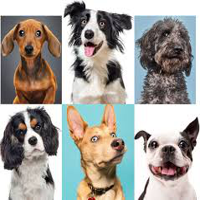

In [44]:
import os
sys.path.append(os.path.join(homepath,'sampleImages'))
imagename = 'dog6.jpg'
pil_img = utObj.loadImage(os.path.join(homepath,'sampleImages'), imagename)
pil_img.resize(size=(200,200))

In [0]:
from lib.gradCam.gradcam import GradCAM, GradCAMpp
from lib.gradCam.gradcam_utils import Normalize, visualize_cam

In [46]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [47]:
resnet = model
resnet.eval(), resnet.cuda();
model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(32, 32))
gradcam = GradCAM(model_dict, True)
gradcampp = GradCAMpp(model_dict)

saliency_map size : torch.Size([4, 4])


In [48]:
mask, _ = gradcam(normed_torch_img)
heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

mask_pp, _ = gradcampp(normed_torch_img)
heatmap_pp, result_pp = visualize_cam(mask_pp.cpu(), torch_img.squeeze().cpu())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [0]:
from torchvision.utils import make_grid
imgs = []
imgs.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
imgs = make_grid(torch.cat(imgs, 0), nrow=5)

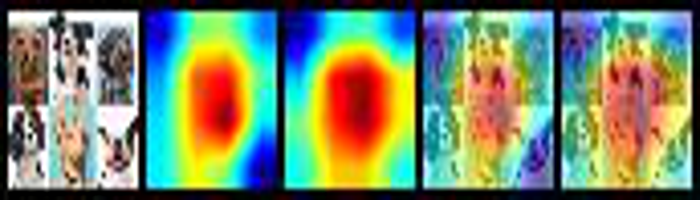

In [50]:
pilimg = utObj.saveimage(images = imgs, outputdirectory=os.path.join(homepath,'outputs'), imagename='dog6_gradCam.jpg')

pilimg.resize((700,200))

In [0]:
pilimg.resize((700,200))